In [6]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

pd.set_option('max_columns', 20, 'max_rows', 400)

In [7]:
df = pd.read_csv('stores_seongbuk_selected.csv', encoding='cp949')
df = df.drop(['wkt_geom', 'ID', '상가업소번', '경도','위도','지번주소','행정동명','시도명','시도코드','지점명'], axis=1)
storesDF = df.copy()

In [8]:
storesDF

,상호명,상권업종대,상권업종중,상권업종소,표준산업분,시군구명
0,리안헤어,생활서비스,이/미용/건강,여성미용실,두발미용업,성북구
1,BYC,소매,의복의류,셔츠/내의/속옷,NaN,성북구
2,동신푸른마트,소매,종합소매점,수퍼마켓,슈퍼마켓,성북구
3,유진인터내셔널,소매,가정/주방/인테리어,인테리어/욕실용품/커튼,그외 기타 분류안된 가정용품 소매업,성북구
4,보문약국,의료,약국/한약방,약국,의약품 및 의료용품 소매업,성북구
...,...,...,...,...,...,...
1444,송선약국,의료,약국/한약방,약국,의약품 및 의료용품 소매업,성북구
1445,이인숙플라워아트,소매,선물/팬시/기념품,꽃집/꽃배달,화초 및 산식물 소매업,성북구
1446,상상놀이학교아이드리,학문/교육,유아교육,유아교육기관기타,유아 교육기관,성북구
1447,소유,소매,의복의류,일반의류,셔츠 및 기타 의복 소매업,성북구


In [9]:
storesDF = storesDF.sort_values('상권업종대')
storesDF

,상호명,상권업종대,상권업종중,상권업종소,표준산업분,시군구명
648,세븐PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,성북구
329,시티노래연습장,관광/여가/오락,무도/유흥/가무,노래방,노래연습장 운영업,성북구
154,메가풀스,관광/여가/오락,경마/경륜/성인오락,게임룸,기타 갬블링 및 베팅업,성북구
1036,당구지존,관광/여가/오락,PC/오락/당구/볼링등,당구장,당구장 운영업,성북구
1206,블링블링노래연습장,관광/여가/오락,무도/유흥/가무,노래방,노래연습장 운영업,성북구
...,...,...,...,...,...,...
186,튼튼영어성북돈암,학문/교육,학문교육기타,학습지보급,방문 교육 학원,성북구
978,팀미니스트리,학문/교육,학원-음악미술무용,피아노/바이올린/기타,예술 학원,성북구
188,지니위니미술,학문/교육,유아교육,유아교육기관기타,유아 교육기관,성북구
826,한울안어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,성북구


In [26]:
storesDF['상권업종대'].value_counts().reset_index().set_index('index')

,상권업종대
index,
소매,634
생활서비스,359
학문/교육,192
의료,96
부동산,79
관광/여가/오락,54
숙박,34
스포츠,1


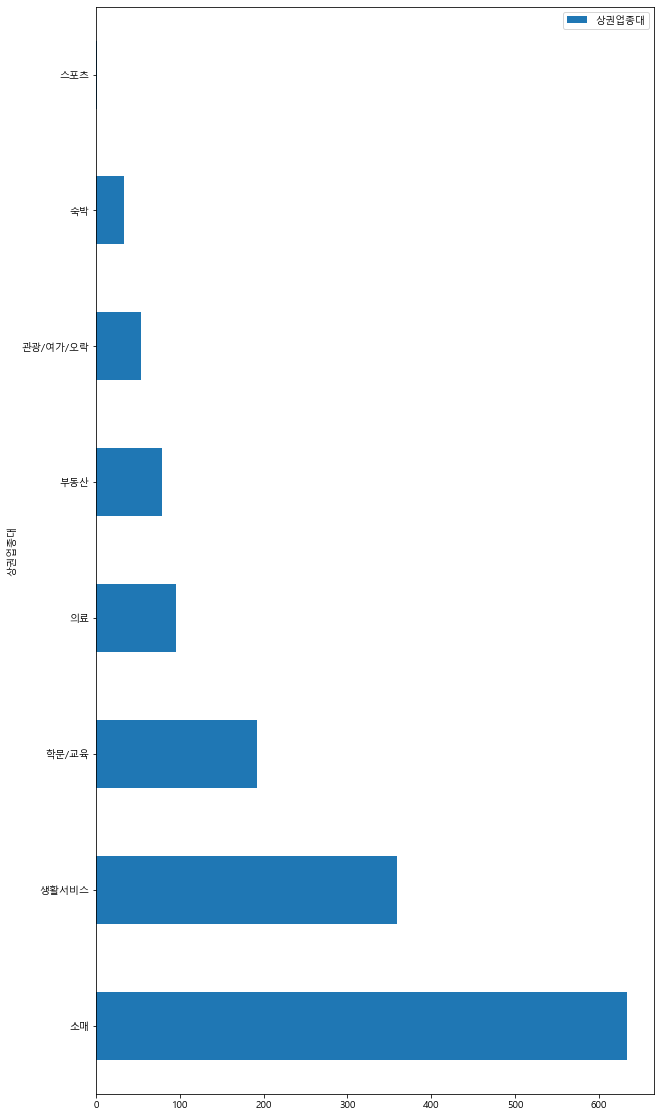

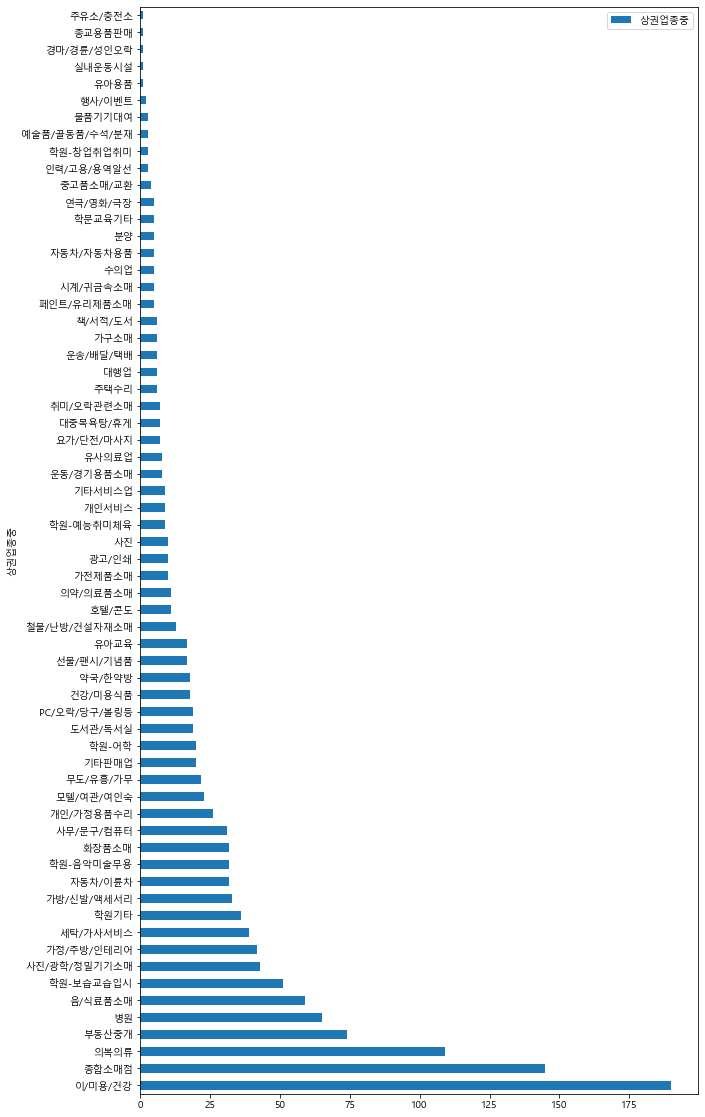

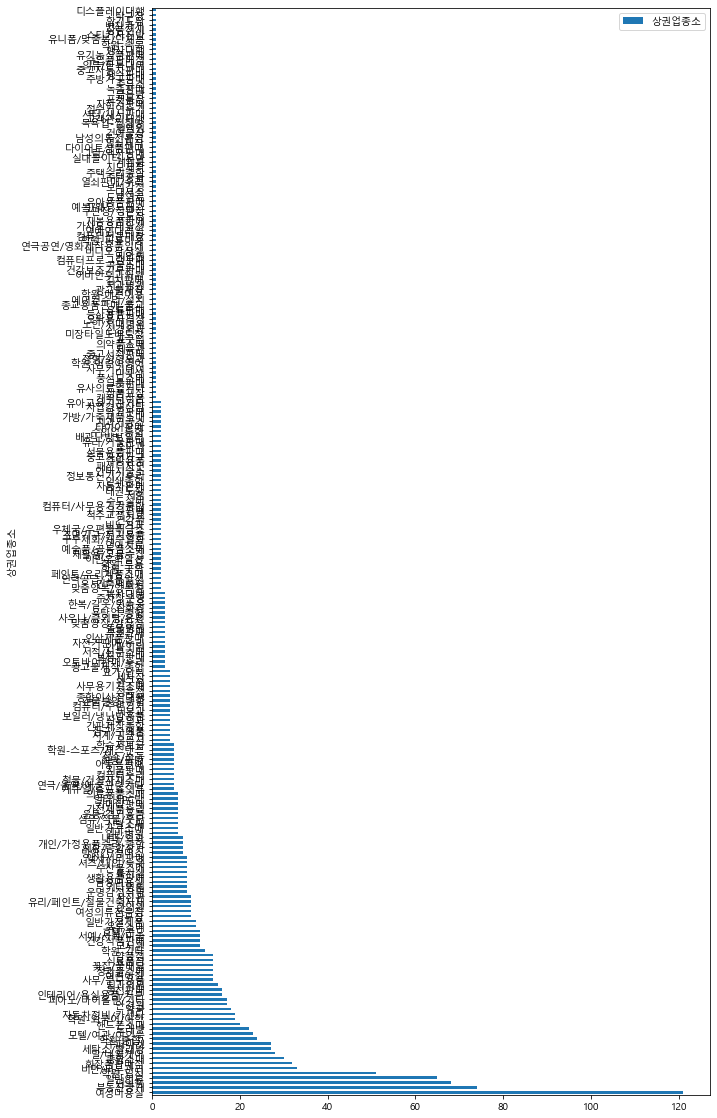

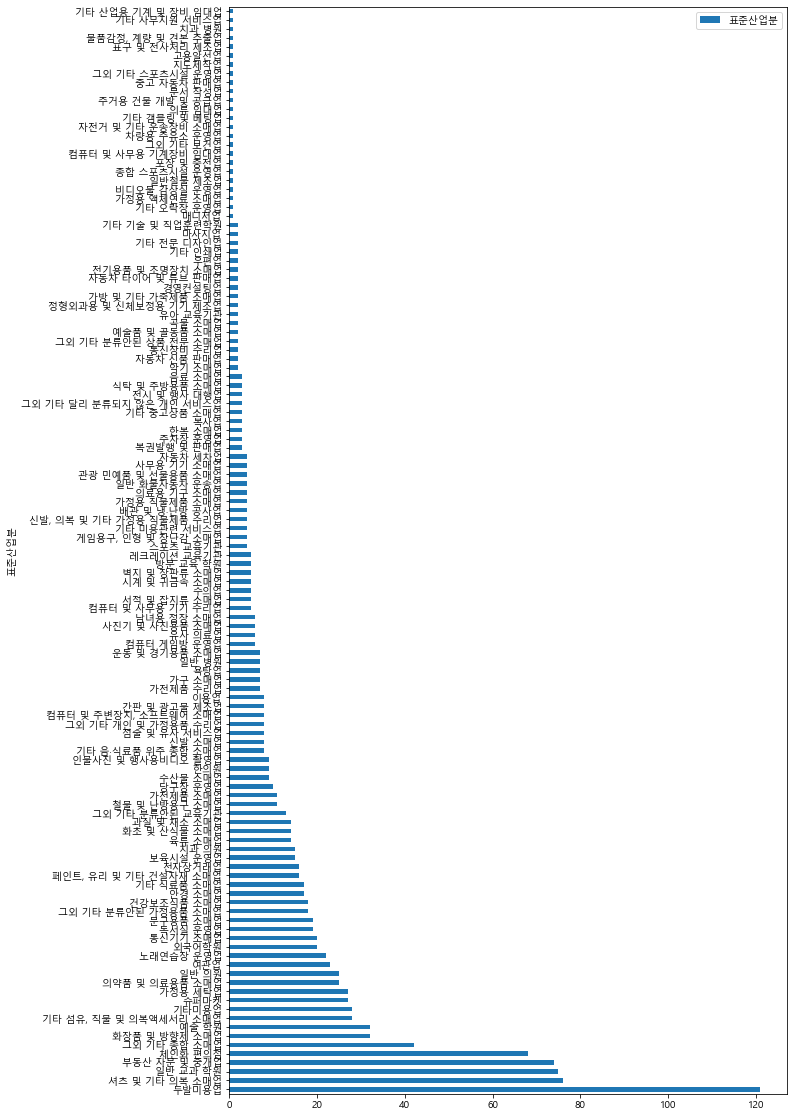

In [35]:
store_lst = ['상권업종대', '상권업종중', '상권업종소','표준산업분']

for classification in store_lst:

    storesDF[classification].value_counts().reset_index().set_index('index').plot(kind='barh', figsize=(10, 20))
    plt.ylabel(f'{classification}')
    plt.show()



In [49]:
len(storesDF)

1449

In [48]:
storesDF['상권업종대'].value_counts()

소매          634
생활서비스       359
학문/교육       192
의료           96
부동산          79
관광/여가/오락     54
숙박           34
스포츠           1
Name: 상권업종대, dtype: int64

In [51]:
storesDF['상권업종대'].value_counts(1) * 100

소매          43.754313
생활서비스       24.775707
학문/교육       13.250518
의료           6.625259
부동산          5.452036
관광/여가/오락     3.726708
숙박           2.346446
스포츠          0.069013
Name: 상권업종대, dtype: float64

In [52]:
storesDF.query('상권업종대 == "관광/여가/오락"')

,상호명,상권업종대,상권업종중,상권업종소,표준산업분,시군구명
648,세븐PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,성북구
329,시티노래연습장,관광/여가/오락,무도/유흥/가무,노래방,노래연습장 운영업,성북구
154,메가풀스,관광/여가/오락,경마/경륜/성인오락,게임룸,기타 갬블링 및 베팅업,성북구
1036,당구지존,관광/여가/오락,PC/오락/당구/볼링등,당구장,당구장 운영업,성북구
1206,블링블링노래연습장,관광/여가/오락,무도/유흥/가무,노래방,노래연습장 운영업,성북구
971,상아당구클럽,관광/여가/오락,PC/오락/당구/볼링등,당구장,당구장 운영업,성북구
1230,성금백,관광/여가/오락,PC/오락/당구/볼링등,당구장,당구장 운영업,성북구
1355,엘리샤요가,관광/여가/오락,요가/단전/마사지,요가/단식,기타 미용관련 서비스업,성북구
828,궁전노래방,관광/여가/오락,무도/유흥/가무,노래방,노래연습장 운영업,성북구
187,필립스노래연습장,관광/여가/오락,무도/유흥/가무,노래방,노래연습장 운영업,성북구


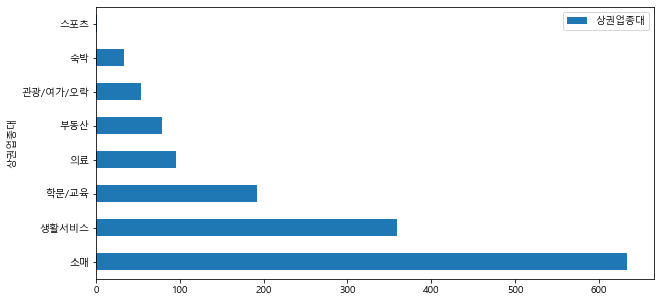

In [37]:
storesDF['상권업종대'].value_counts().reset_index().set_index('index').plot(kind='barh', figsize=(10, 5))
plt.ylabel('상권업종대')
plt.show()

In [56]:
storesDF.query('상권업종중 == "이/미용/건강"')

,상호명,상권업종대,상권업종중,상권업종소,표준산업분,시군구명
1341,놀이터쌀롱,생활서비스,이/미용/건강,여성미용실,두발미용업,성북구
693,맷블랙,생활서비스,이/미용/건강,여성미용실,두발미용업,성북구
696,강에스테틱,생활서비스,이/미용/건강,비만/피부관리,NaN,성북구
699,카라미용실,생활서비스,이/미용/건강,여성미용실,두발미용업,성북구
691,라엘왁싱&속눈썹,생활서비스,이/미용/건강,비만/피부관리,NaN,성북구
683,슬짱네일,생활서비스,이/미용/건강,발/네일케어,기타미용업,성북구
1351,예림헤어,생활서비스,이/미용/건강,여성미용실,두발미용업,성북구
668,누벨바그헤어살롱,생활서비스,이/미용/건강,여성미용실,두발미용업,성북구
1360,재희미용실,생활서비스,이/미용/건강,여성미용실,두발미용업,성북구
646,아이래쉬클리닉,생활서비스,이/미용/건강,비만/피부관리,NaN,성북구


In [57]:
storesDF.query('상권업종중 == "종합소매점"')

,상호명,상권업종대,상권업종중,상권업종소,표준산업분,시군구명
166,세븐일레븐동소문점,소매,종합소매점,편의점,체인화 편의점,성북구
1020,홈마트,소매,종합소매점,수퍼마켓,슈퍼마켓,성북구
192,포유365,소매,종합소매점,편의점,체인화 편의점,성북구
193,GS25성북삼선,소매,종합소매점,편의점,체인화 편의점,성북구
165,에이티에스코퍼레이션,소매,종합소매점,생활용품판매,그외 기타 종합 소매업,성북구
962,GS25성북구청점,소매,종합소매점,편의점,체인화 편의점,성북구
1346,농심할인마트,소매,종합소매점,수퍼마켓,슈퍼마켓,성북구
1021,만물상회,소매,종합소매점,종합소매,그외 기타 종합 소매업,성북구
197,로그인편의점성신여대점,소매,종합소매점,편의점,체인화 편의점,성북구
953,서울북부녹색소비자연대,소매,종합소매점,생활용품판매,그외 기타 종합 소매업,성북구


In [55]:
storesDF['상권업종중'].value_counts(1) * 100

이/미용/건강          13.112491
종합소매점            10.006901
의복의류              7.522429
부동산중개             5.106970
병원                4.485852
음/식료품소매           4.071774
학원-보습교습입시         3.519669
사진/광학/정밀기기소매      2.967564
가정/주방/인테리어        2.898551
세탁/가사서비스          2.691511
학원기타              2.484472
가방/신발/액세서리        2.277433
자동차/이륜차           2.208420
학원-음악미술무용         2.208420
화장품소매             2.208420
사무/문구/컴퓨터         2.139406
개인/가정용품수리         1.794341
모텔/여관/여인숙         1.587302
무도/유흥/가무          1.518288
기타판매업             1.380262
학원-어학             1.380262
도서관/독서실           1.311249
PC/오락/당구/볼링등      1.311249
건강/미용식품           1.242236
약국/한약방            1.242236
선물/팬시/기념품         1.173223
유아교육              1.173223
철물/난방/건설자재소매      0.897170
호텔/콘도             0.759144
의약/의료품소매          0.759144
가전제품소매            0.690131
광고/인쇄             0.690131
사진                0.690131
학원-예능취미체육         0.621118
개인서비스             0.621118
기타서비스업            0.621118
운동/경기용품소매         0.552105
유

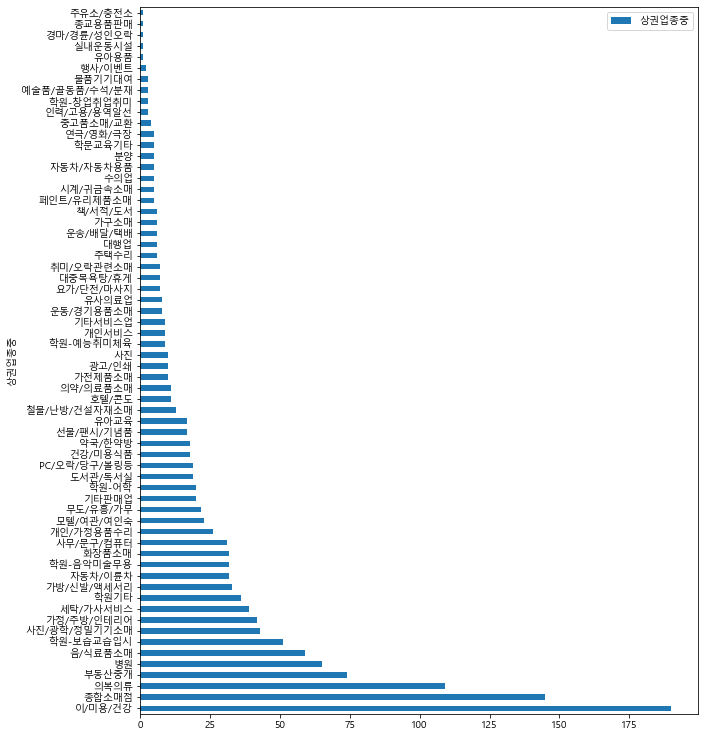

In [41]:
storesDF['상권업종중'].value_counts().reset_index().set_index('index').plot(kind='barh', figsize=(10, 13))
plt.ylabel('상권업종중')
plt.show()

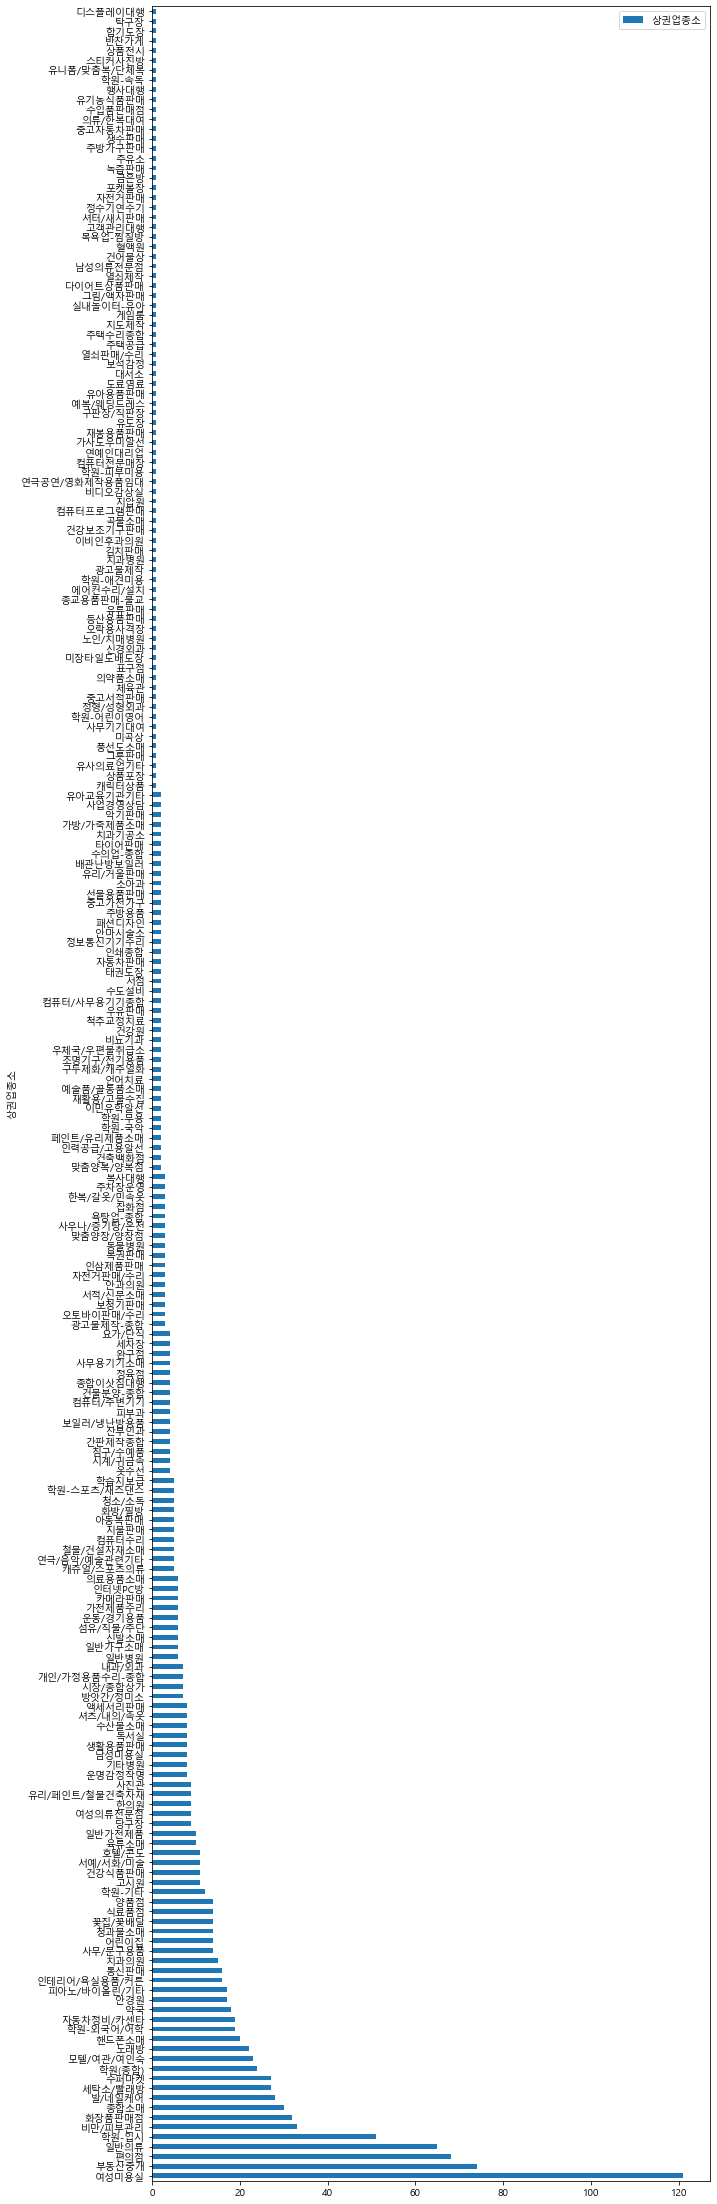

In [45]:
storesDF['상권업종소'].value_counts().reset_index().set_index('index').plot(kind='barh', figsize=(10, 40))
plt.ylabel('상권업종소')
plt.show()

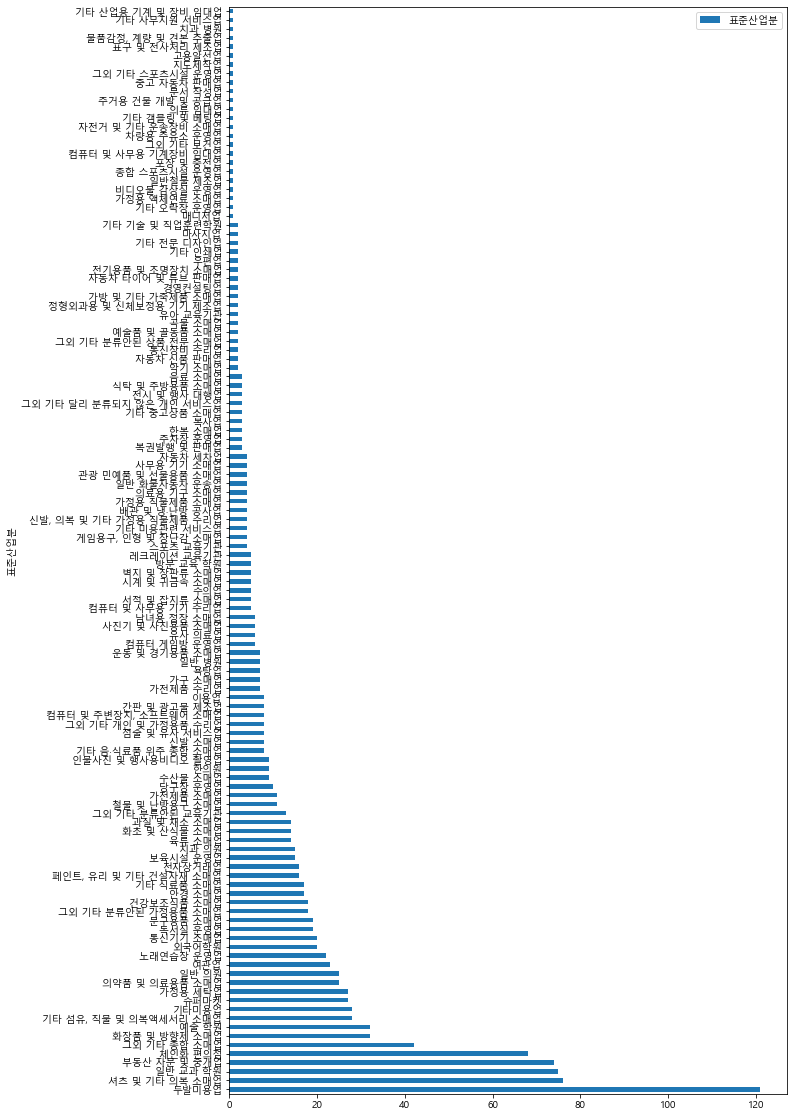

In [47]:
storesDF['표준산업분'].value_counts().reset_index().set_index('index').plot(kind='barh', figsize=(10, 20))
plt.ylabel('표준산업분')
plt.show()